# Import Library

In [2]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics, preprocessing
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

# 시작

In [45]:
cwd = os.getcwd()
print('현재 폴더 경로 : ', cwd)
# 폴더 위치 변경
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터")
print('변경 후 폴더 경로 : ', cwd)
print('현재 폴더 파일 : ', os.listdir())
data = pd.read_csv('Training Case 1.csv', encoding='CP949')
print('feature 항목 : ', data.columns)
data

현재 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
변경 후 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터
현재 폴더 파일 :  ['Block perspective.csv', 'CHE I perspective.csv', 'CHE II perspective.csv', 'Container Data.csv', 'Container DS Data.csv', 'Container DS perspective.csv', 'Container LD perspective.csv', 'Container perspective.csv', 'Crawling DS Container.csv', 'Data.csv', 'DS.csv', 'DStoLD.csv', 'Dwell Time', 'Gate perspective.csv', 'GI perspective.csv', 'GO perspective.csv', 'ITV perspective.csv', 'LD.csv', 'Outlier DS.csv', 'Outlier LD.csv', 'QC perspective.csv', 'Training Case 1.csv', 'Vessel perspective.csv', 'Weather.csv', '이상치.csv']
feature 항목 :  Index(['CONTAINER_NO', 'VESSEL_ID', 'COUNTRY_POD', 'CITY_POD', 'Full/Empty',
       'BLOCK', 'BAY', 'YC_ID', 'YT_ID', 'QC_ID', 'QUEUE_POSITION_NUMBER',
       'QUEUE_POSITION_HACK_DACK', 'H_BOX', 'WEIGHT', 'SIZE', 'FREEZE', 'IMDG',
       'UNNO', 'CARGO_MANAGEMENT_NUM', 'SEAL_NUM', 'COMPANY', 'IMPORT/EXPORT',
       'T/S', 'TEMPERATURE', 

,CONTAINER_NO,VESSEL_ID,COUNTRY_POD,CITY_POD,Full/Empty,BLOCK,BAY,YC_ID,YT_ID,QC_ID,...,IMPORT/EXPORT,T/S,TEMPERATURE,HUMIDITY,RAIN,WIND_SPEED,PRECIPITATION,DAY,TRUCK IN PROCESS,Moving Time
0,UESU,SXNW,KR,PUS,F,2B,74,TC224,YT529,GC110,...,T/S Local,자부두,-1.9,30.7,0,2.4,0.0,Monday,60,15.066667
1,UESU,SXNW,KR,PUS,F,1C,10,TC231,YT526,GC109,...,T/S Import,타부두,-1.9,30.7,0,2.4,0.0,Monday,55,15.400000
2,TRLU,SXNW,KR,PUS,F,1F,40,TC261,YT504,GC111,...,T/S Import,타부두,-1.9,30.7,0,2.4,0.0,Monday,49,14.916667
3,TNZU,SXNW,KR,PUS,F,2C,98,TC234,YT505,GC112,...,T/S Local,자부두,-2.6,32.7,0,2.4,0.0,Monday,23,11.483333
4,TGHU,SXNW,KR,PUS,F,1F,80,TC262,YT527,GC111,...,T/S Import,타부두,-1.1,28.5,0,2.3,0.0,Monday,59,17.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73568,BMOU,MHAH,KR,PUS,F,3B,87,TC226,YT540,GC111,...,T/S Local,자부두,0.1,44.3,0,1.9,0.0,Saturday,15,13.666667
73569,BMOU,MAUO,KR,PUS,F,1B,87,TC222,YT552,GC111,...,T/S Local,자부두,-2.4,41.0,0,0.6,0.0,Saturday,50,17.250000
73570,BMOU,MAUO,KR,PUS,F,2B,83,TC224,YT560,GC112,...,T/S Local,자부두,-3.2,50.5,0,0.6,0.0,Saturday,37,19.016667
73571,BMOU,MAUO,KR,PUS,F,3B,87,TC226,YT588,GC109,...,T/S Local,자부두,-3.2,50.5,0,0.6,0.0,Saturday,42,11.700000


In [46]:
data.isnull().sum()

CONTAINER_NO                    0
VESSEL_ID                       0
COUNTRY_POD                     0
CITY_POD                        0
Full/Empty                      0
BLOCK                           0
BAY                             0
YC_ID                           0
YT_ID                           0
QC_ID                           0
QUEUE_POSITION_NUMBER           0
QUEUE_POSITION_HACK_DACK        0
H_BOX                           0
WEIGHT                       2076
SIZE                        12807
FREEZE                      69718
IMDG                        72059
UNNO                        72079
CARGO_MANAGEMENT_NUM           69
SEAL_NUM                    16994
COMPANY                       149
IMPORT/EXPORT                  82
T/S                         31561
TEMPERATURE                     0
HUMIDITY                        0
RAIN                            0
WIND_SPEED                      0
PRECIPITATION                   0
DAY                             0
TRUCK IN PROCE

In [47]:
data.dropna(subset = 'WEIGHT', axis=0, inplace=True)
data.dropna(subset = 'SIZE', axis=0, inplace=True)

In [48]:
data.reset_index(drop=True, inplace=True)
print(data.shape)

(60766, 31)


In [29]:
data.describe()

,QUEUE_POSITION_NUMBER,H_BOX,WEIGHT,SIZE,FREEZE,IMDG,UNNO,TEMPERATURE,HUMIDITY,RAIN,WIND_SPEED,PRECIPITATION,TRUCK IN PROCESS,Moving Time
count,60766.000000,60766.000000,60766.000000,60766.000000,3208.000000,1313.000000,1289.000000,60766.000000,60766.000000,60766.000000,60766.000000,60766.000000,60766.000000,60766.000000
mean,35.959089,2330.591811,17.237366,3600.675723,-13.868173,6.909139,2485.894492,1.316978,50.722518,0.037949,1.944178,0.052752,29.123490,13.244361
std,21.863354,1168.477070,10.066061,1183.746733,13.360505,2.433276,752.652928,4.866298,23.640354,0.191074,1.402731,0.307913,13.783666,5.182424
min,1.000000,43.000000,1.000000,2210.000000,-60.000000,2.000000,1013.000000,-10.000000,16.500000,0.000000,0.000000,0.000000,0.000000,3.216667
25%,18.000000,1361.000000,5.200000,2210.000000,-21.000000,4.300000,1823.000000,-2.600000,30.700000,0.000000,0.700000,0.000000,19.000000,9.416667
50%,34.000000,2632.000000,20.800000,4510.000000,-18.000000,8.000000,2922.000000,1.400000,46.300000,0.000000,1.800000,0.000000,28.000000,13.416667
75%,50.000000,3397.000000,26.000000,4510.000000,-18.000000,9.000000,3077.000000,5.100000,66.700000,0.000000,3.100000,0.000000,38.000000,15.850000
max,94.000000,4030.000000,49.000000,9510.000000,32.000000,9.000000,3496.000000,13.300000,99.900000,1.000000,6.100000,3.000000,81.000000,523.166667


In [49]:
# Label Encodering
features = [x for x in data.columns if x not in ['Moving Time']]
features

['CONTAINER_NO',
 'VESSEL_ID',
 'COUNTRY_POD',
 'CITY_POD',
 'Full/Empty',
 'BLOCK',
 'BAY',
 'YC_ID',
 'YT_ID',
 'QC_ID',
 'QUEUE_POSITION_NUMBER',
 'QUEUE_POSITION_HACK_DACK',
 'H_BOX',
 'WEIGHT',
 'SIZE',
 'FREEZE',
 'IMDG',
 'UNNO',
 'CARGO_MANAGEMENT_NUM',
 'SEAL_NUM',
 'COMPANY',
 'IMPORT/EXPORT',
 'T/S',
 'TEMPERATURE',
 'HUMIDITY',
 'RAIN',
 'WIND_SPEED',
 'PRECIPITATION',
 'DAY',
 'TRUCK IN PROCESS']

In [50]:
for feature in features:
    lbl_enc = preprocessing.LabelEncoder()
    data[feature] = lbl_enc.fit_transform(data[feature].fillna("-1").astype(str).values)

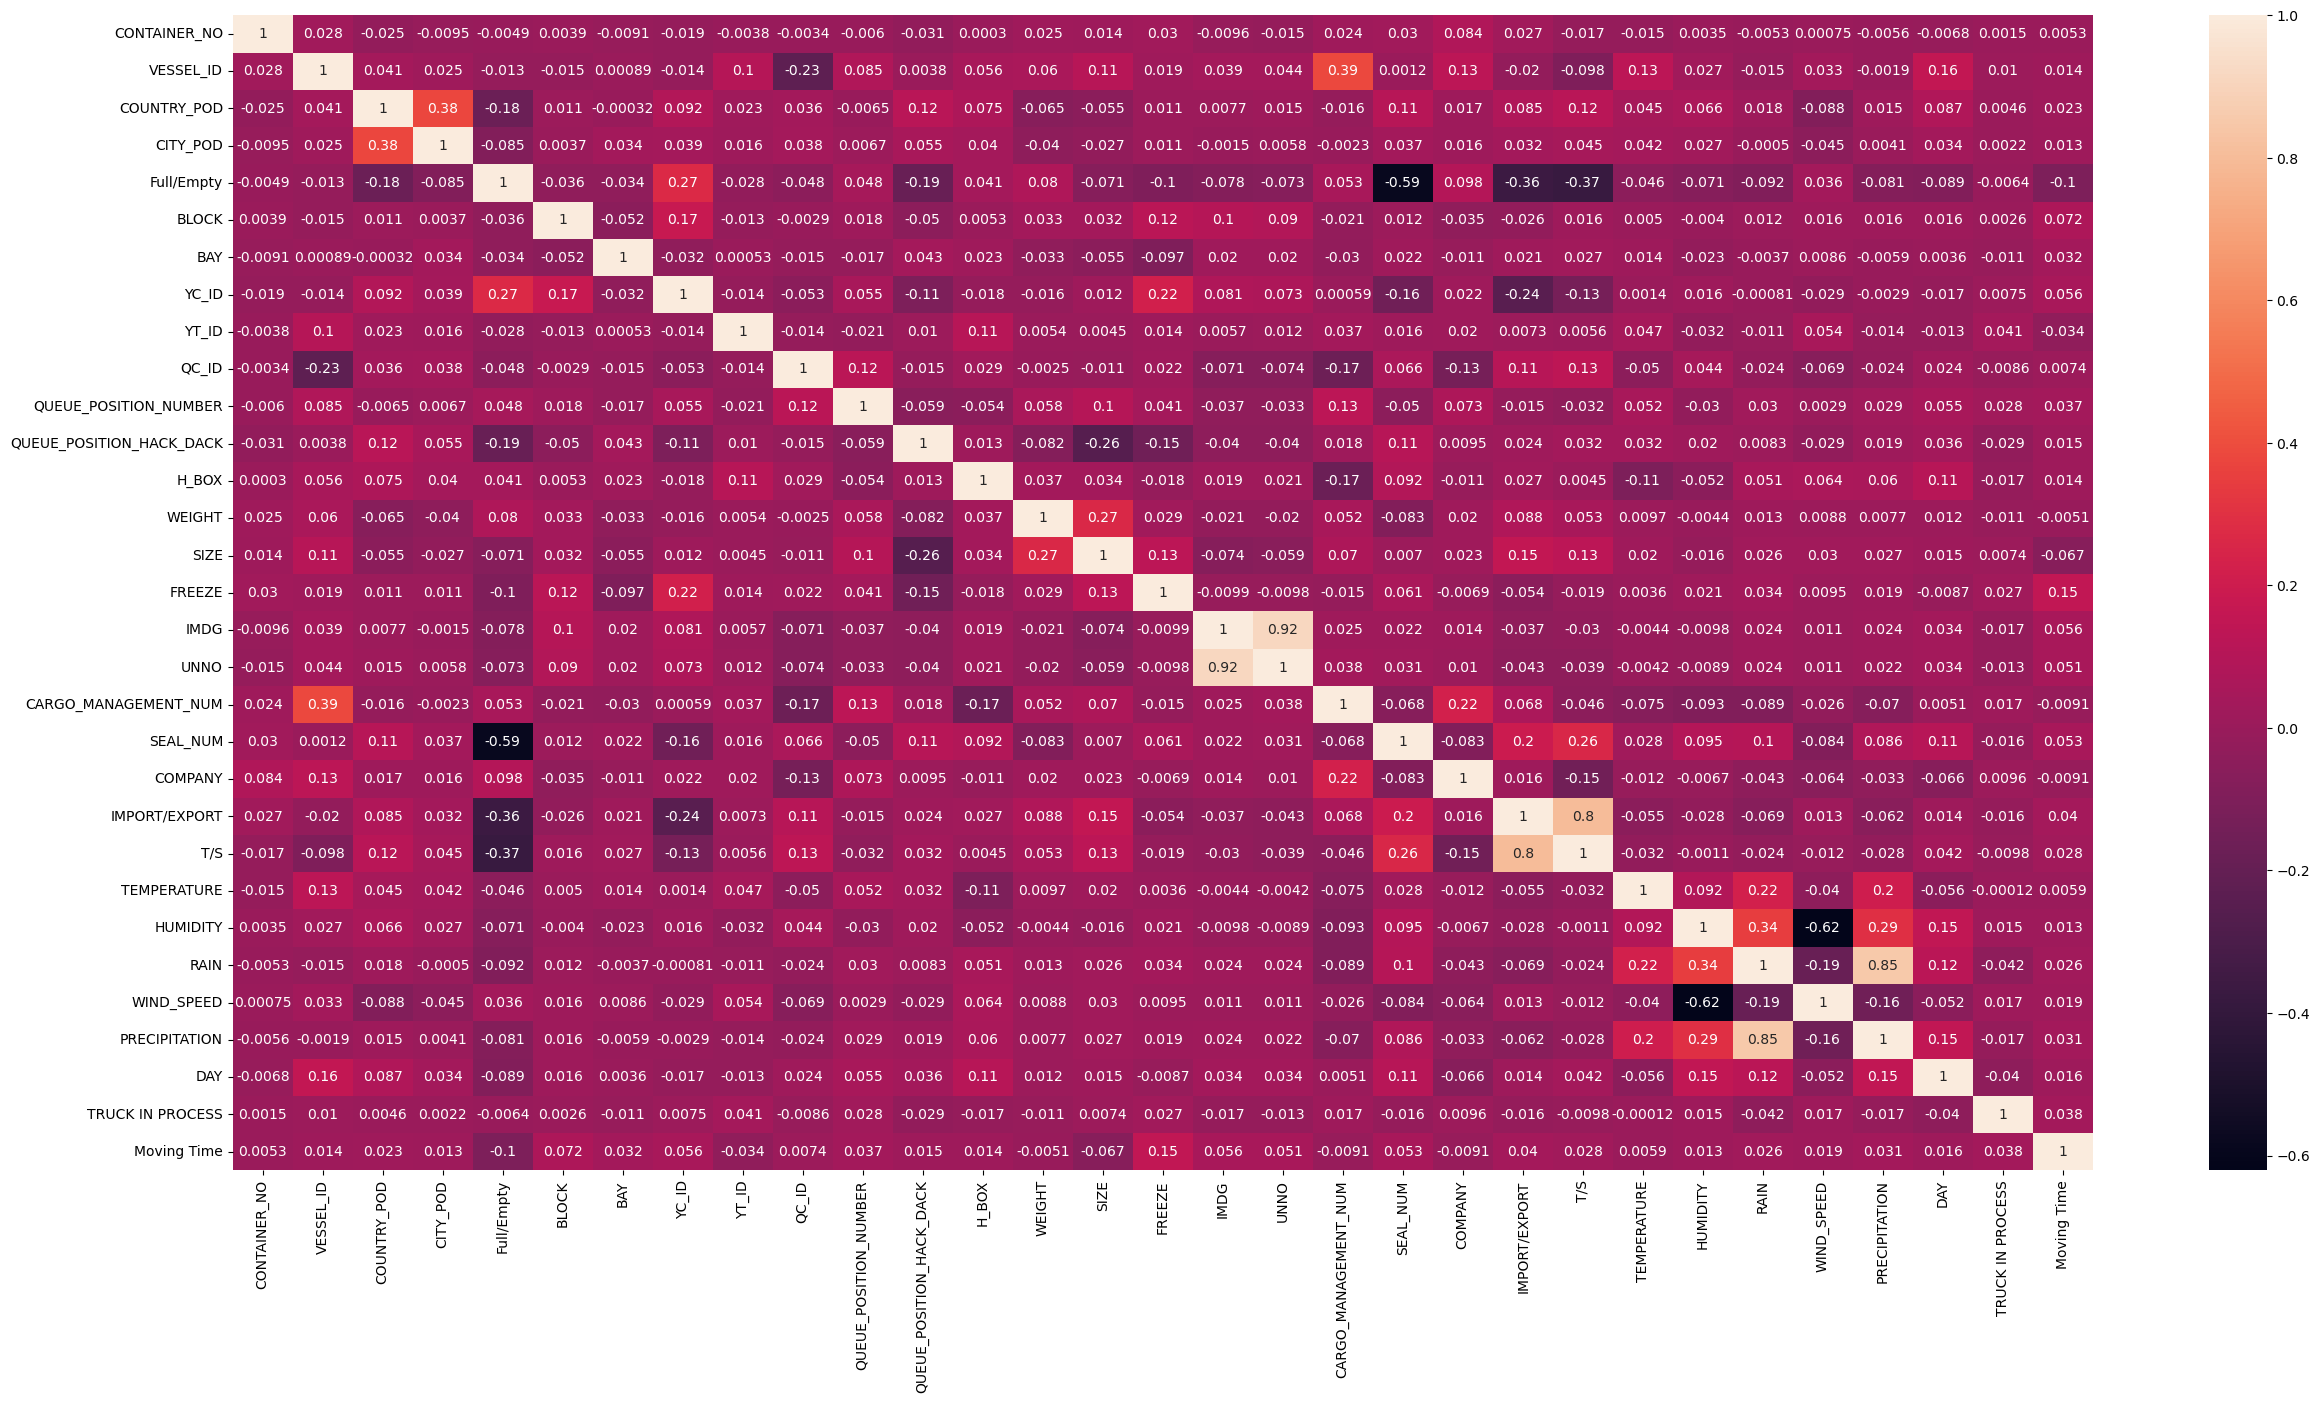

In [39]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [52]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=120)

# 랜덤포레스트 모델 생성
tRF = RandomForestRegressor(max_depth=15, n_estimators=1500)
tRF.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error 

# MAE 측정
# MAE_train
y_pred_train = tRF.predict(X_train)
y_pred_test = tRF.predict(X_test)


mae_train = mean_absolute_error(y_train,y_pred_train)
mae_test = mean_absolute_error(y_test,y_pred_test)
print('train_MAE: ',mae_train)
print('test_MAE: ',mae_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Train MSE : ", mse_train)
print("Train RMSE : ", mse_train**0.5)
print("Test MSE : ", mse_test)
print("Test RMSE : ", mse_test**0.5)

r2 = r2_score(y_test, tRF.predict(X_test))
print('테스트 결정계수(R2, 설명력) :', r2)     

train_MAE:  1.6300521172619131
test_MAE:  2.04039110591483
Train MSE :  6.023077216044954
Train RMSE :  2.4541958389755605
Test MSE :  10.541294307868862
Test RMSE :  3.2467359467423376
테스트 결정계수(R2, 설명력) : 0.5185098170640072


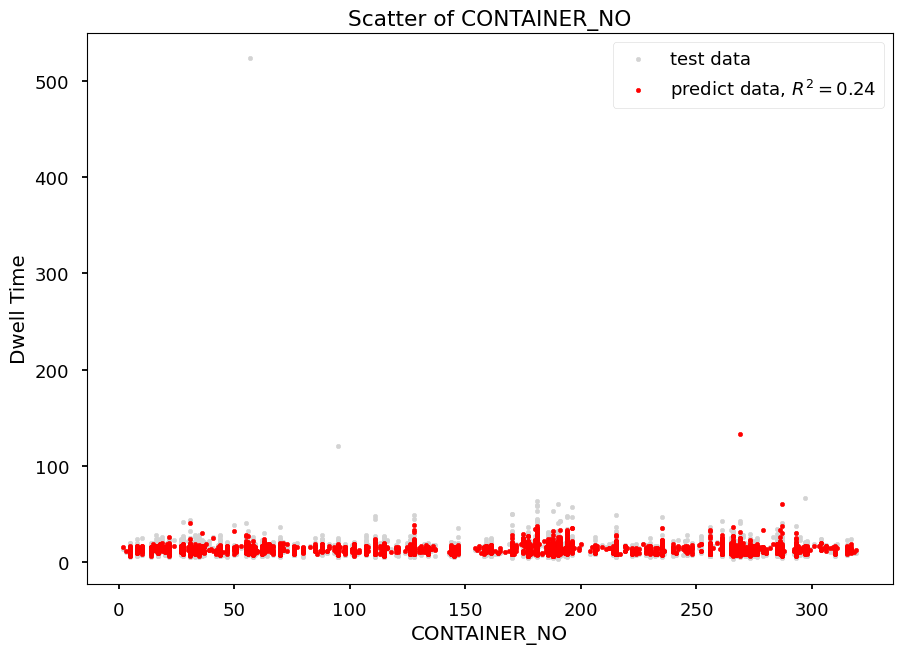

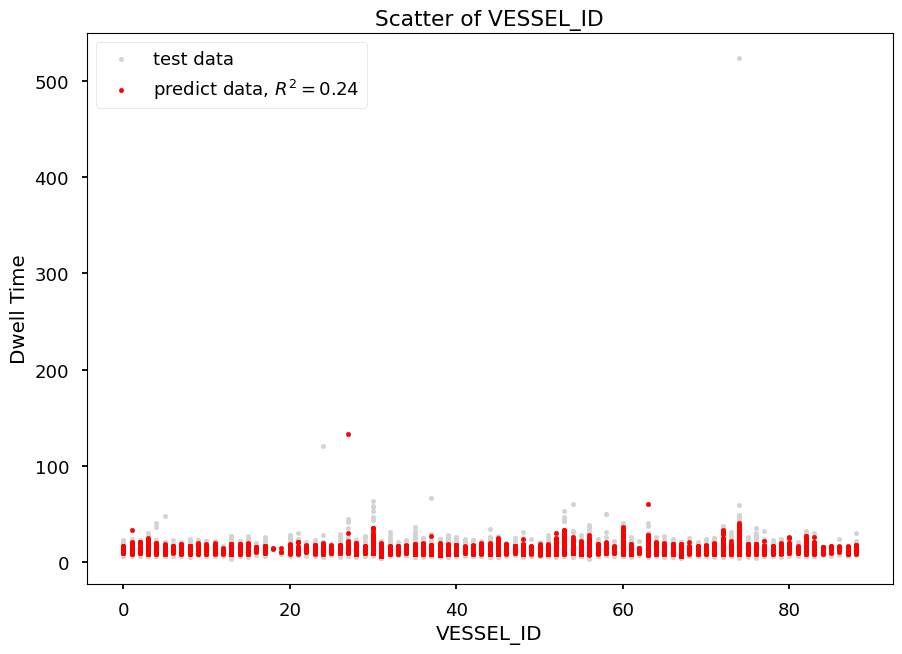

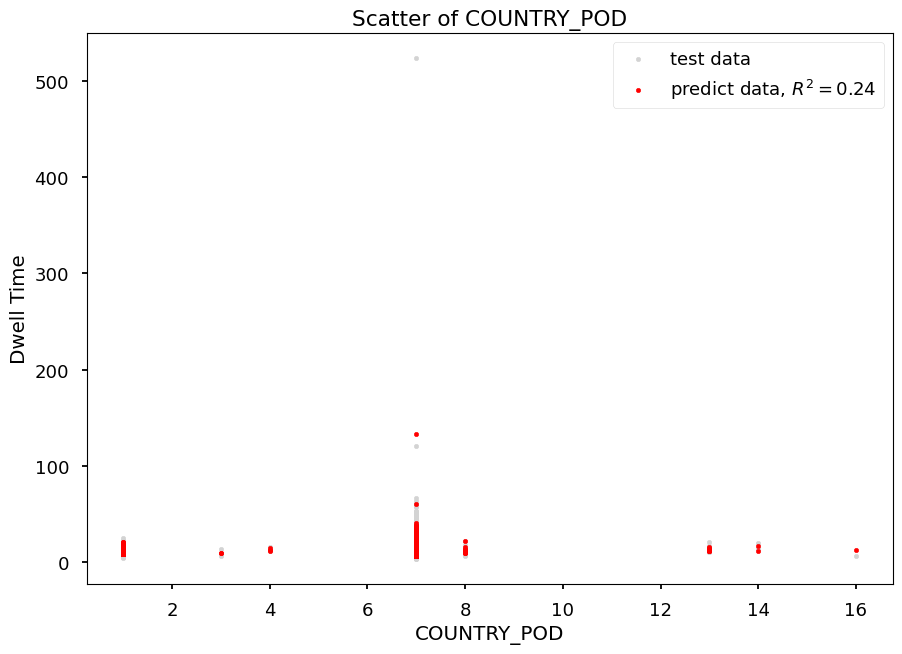

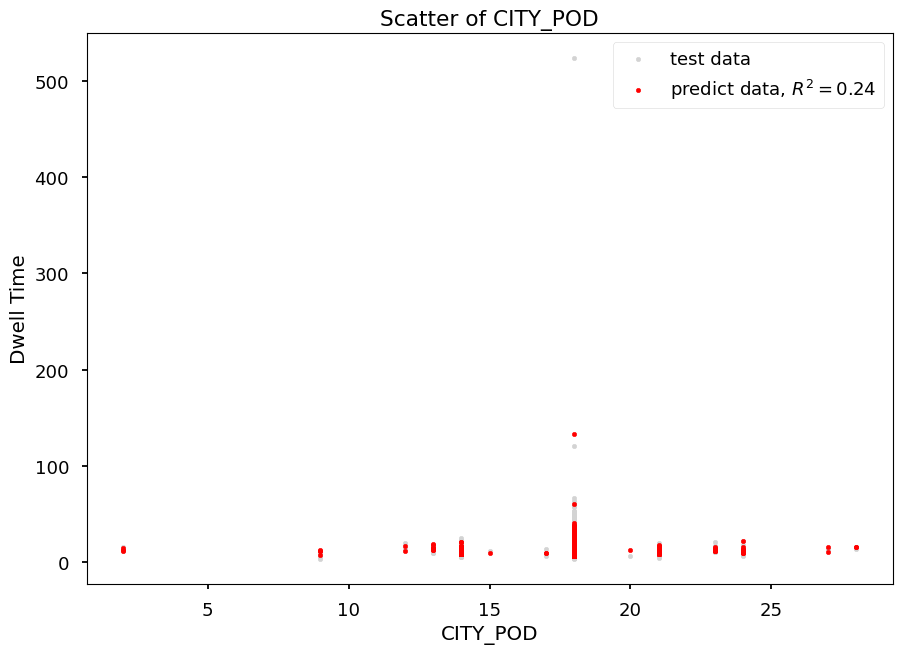

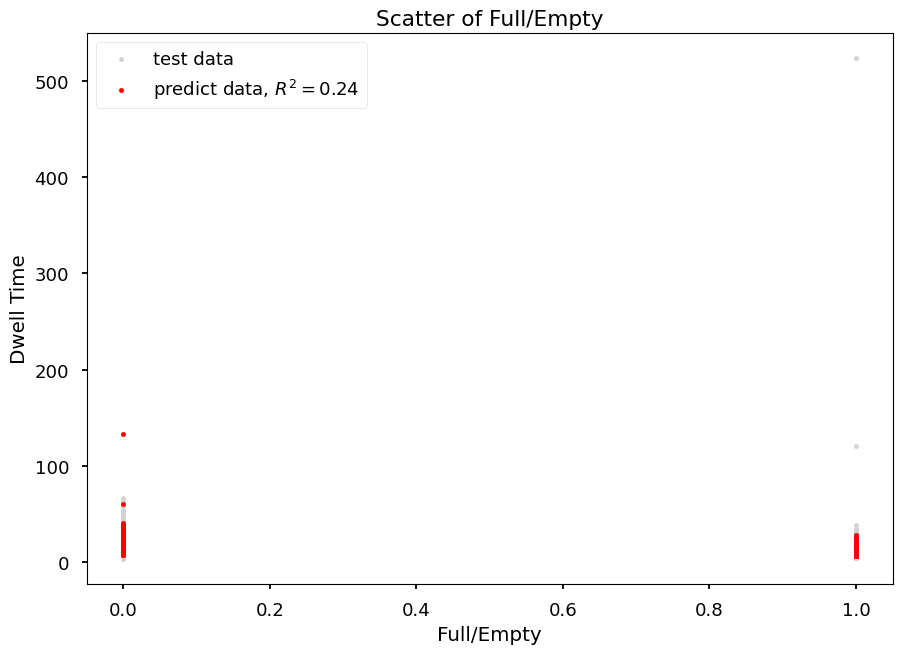

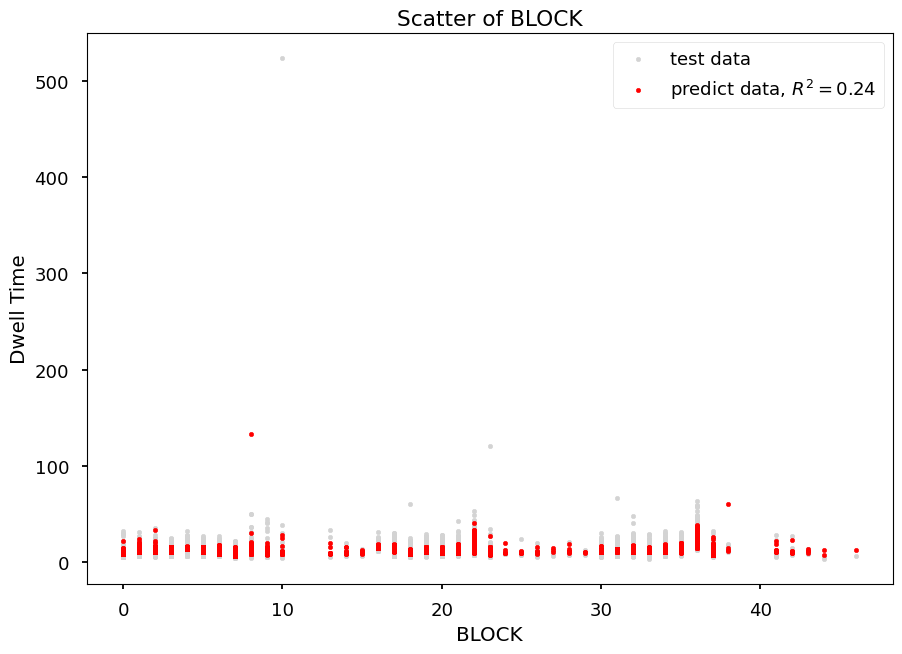

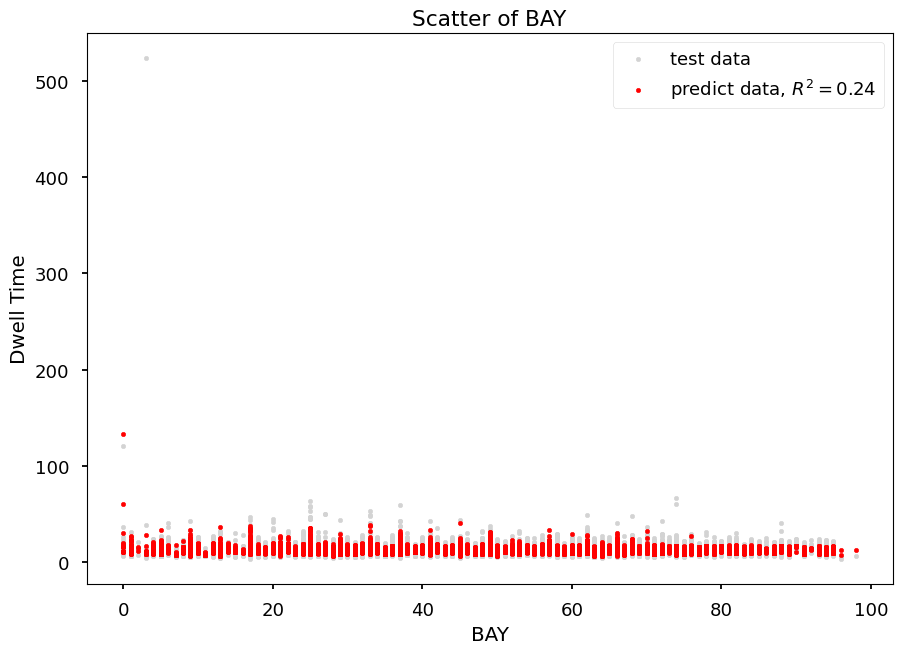

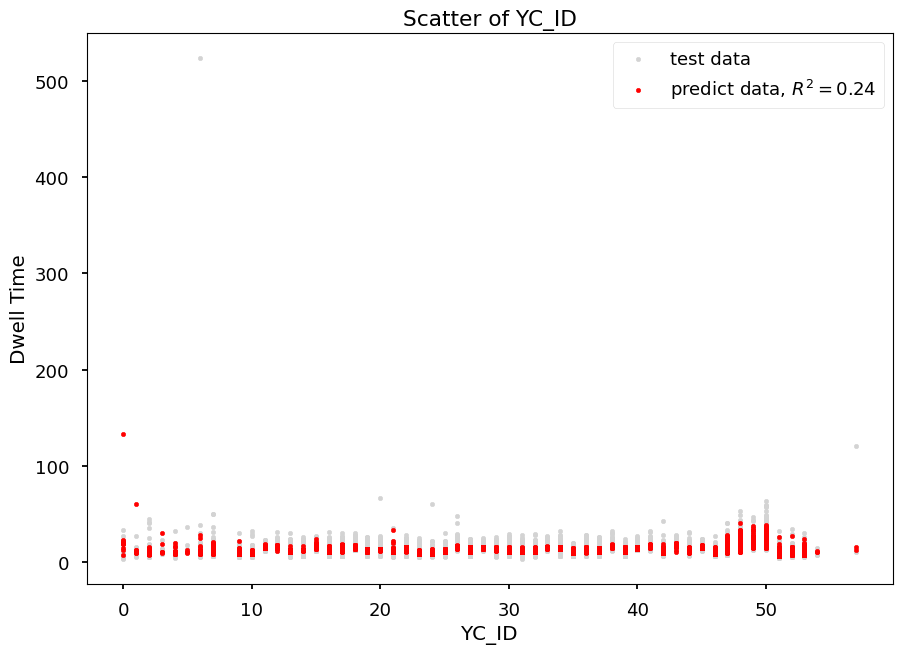

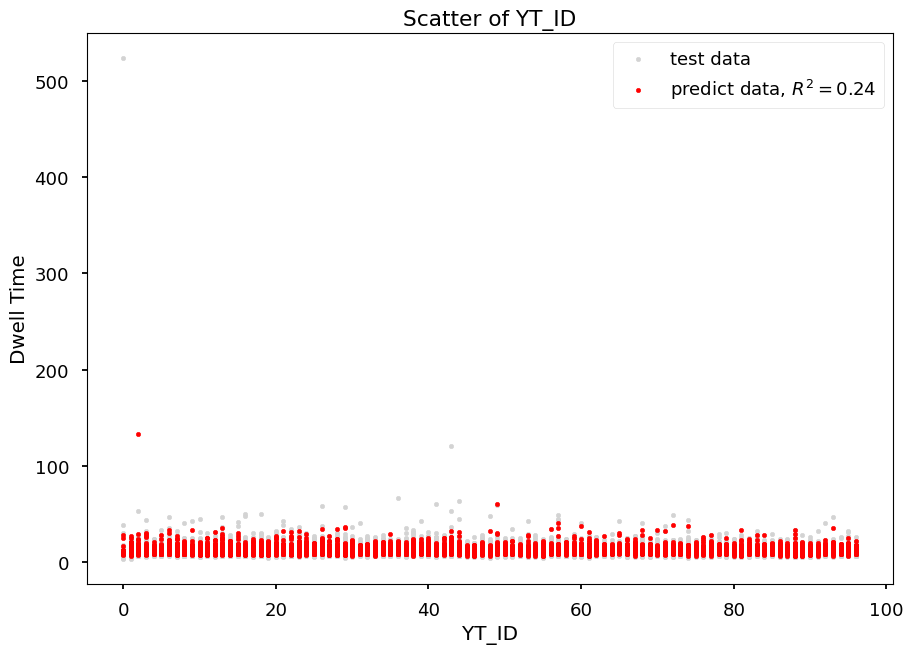

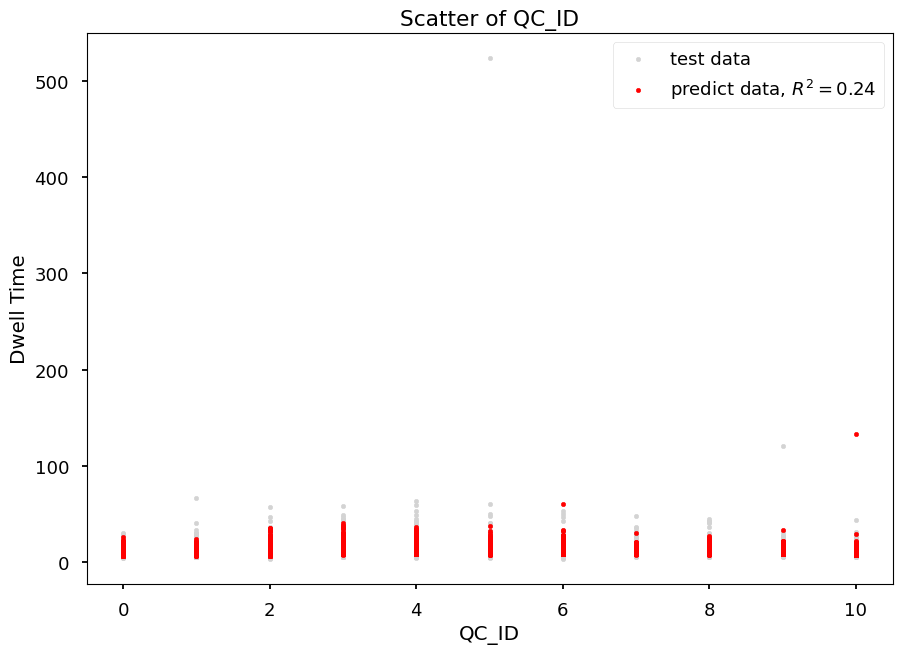

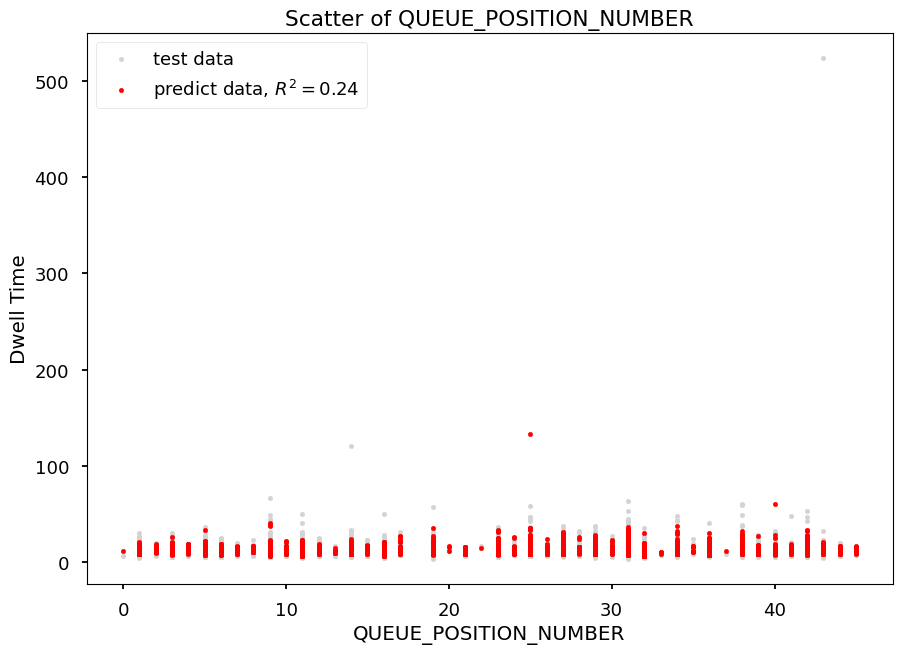

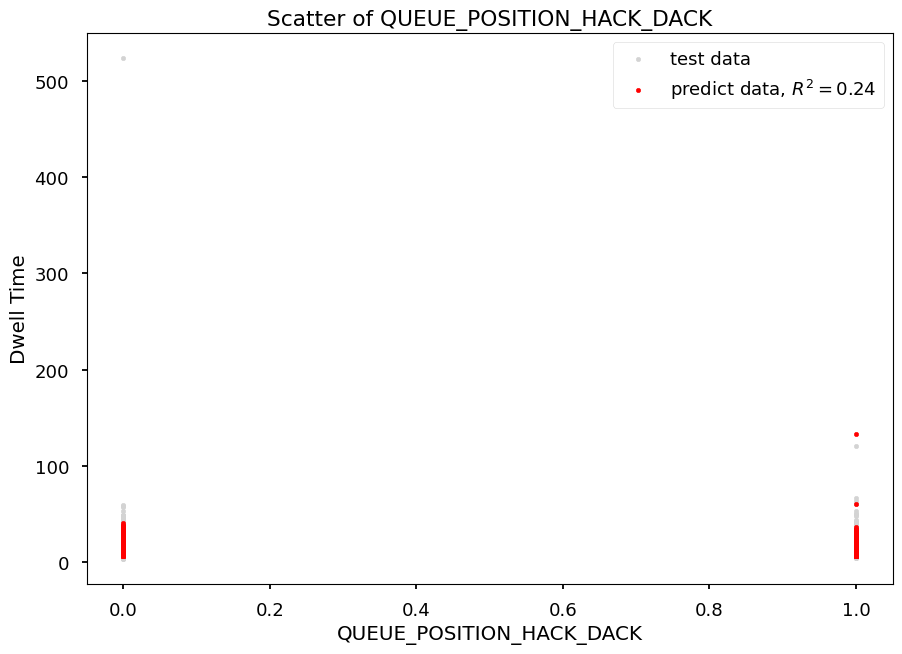

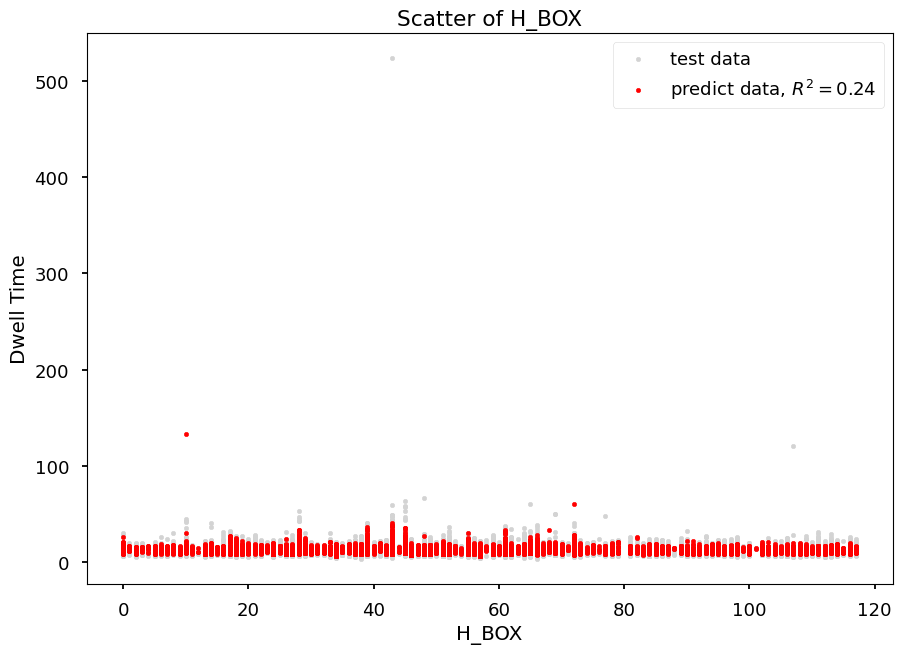

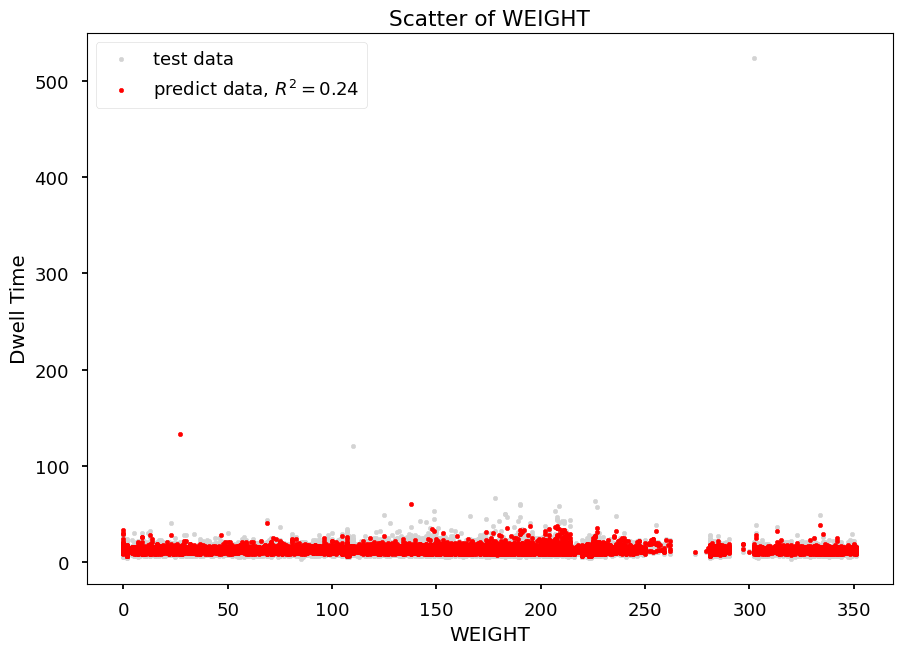

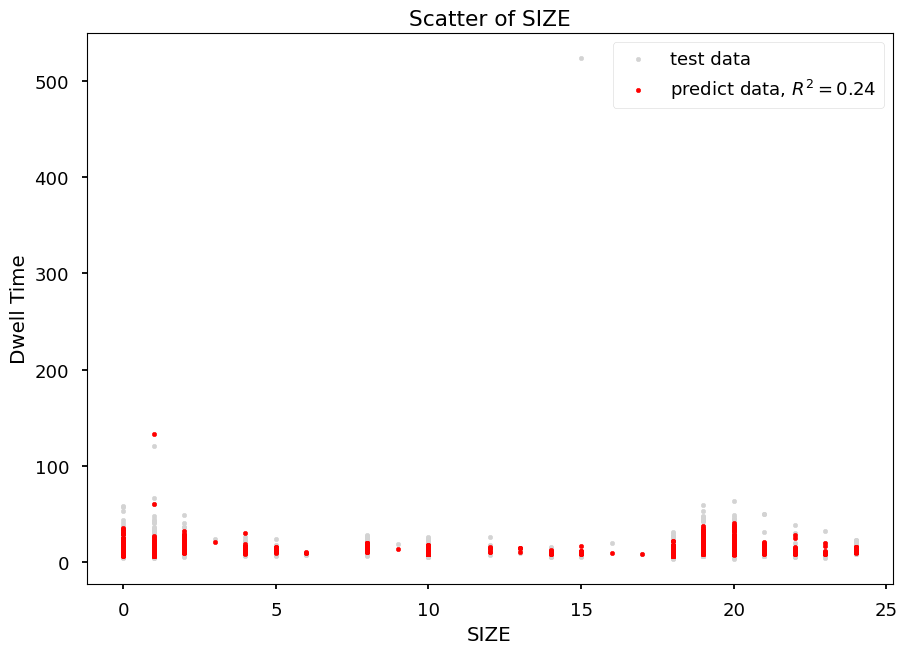

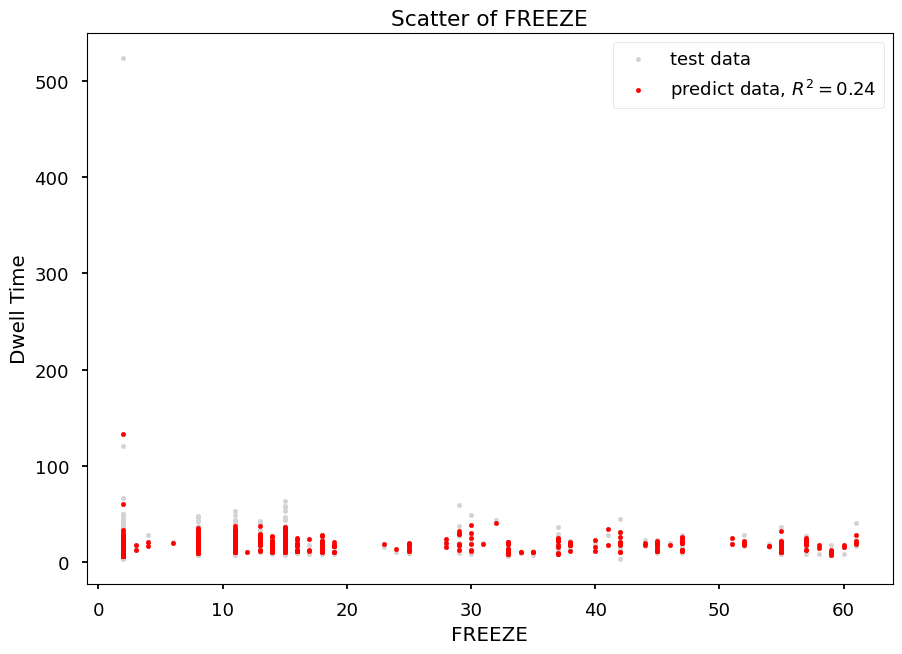

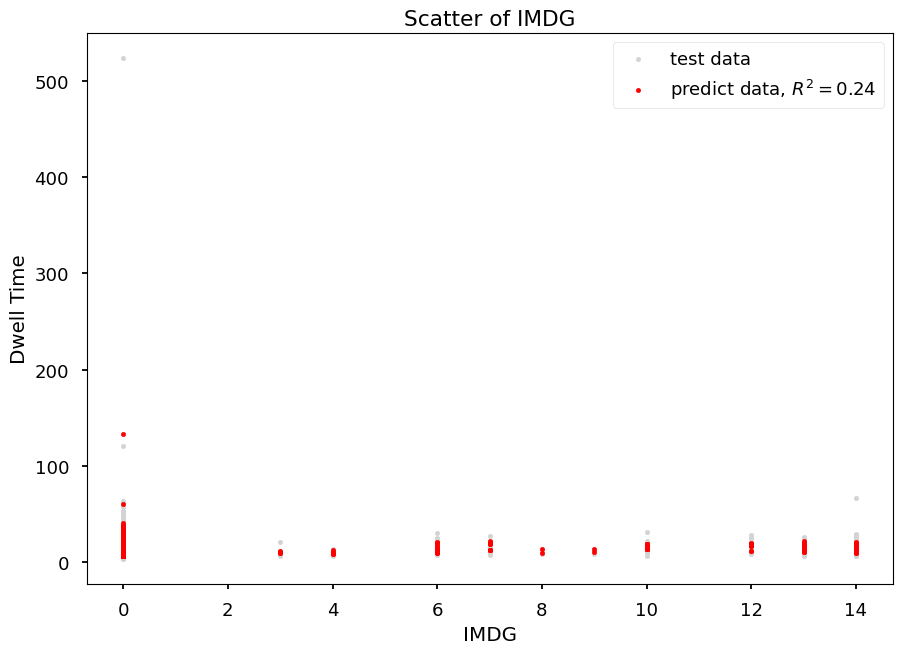

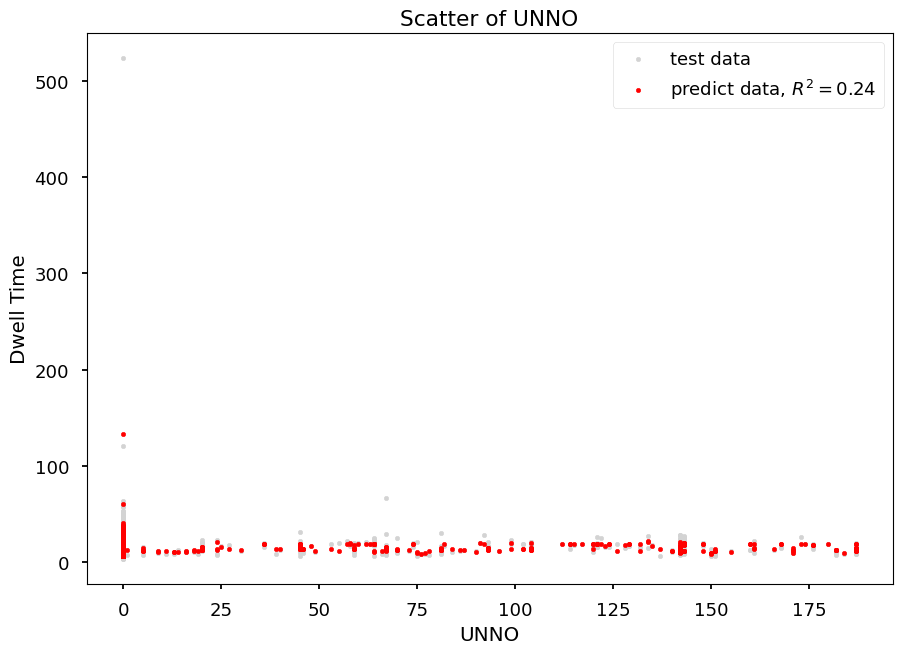

KeyboardInterrupt: 

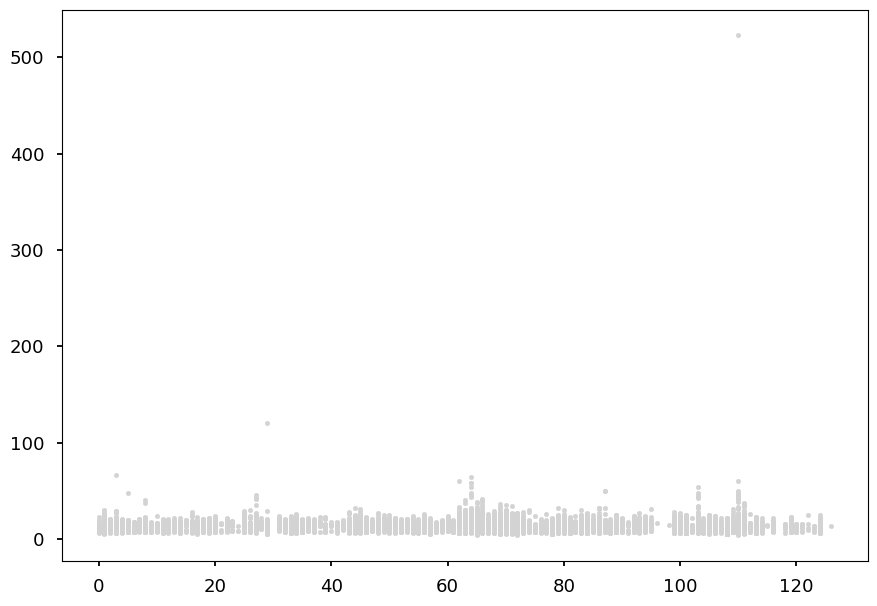

In [41]:
from matplotlib import style 
style.use('seaborn-talk')
for feature in features :
    plt.scatter(X_test[feature], y_test, c='lightgray', label='test data', s = 10)
    plt.scatter(X_test[feature], tRF.predict(X_test), c='r', label='predict data, $R^2=%.2f$'%r2, s = 10)
    plt.xlabel(feature)
    plt.title('Scatter of ' + feature)
    plt.ylabel('Dwell Time')
    plt.legend()
    plt.show()

In [53]:
# 변수중요도
imp = tRF.feature_importances_
imp



array([0.01567134, 0.02872586, 0.00022877, 0.0005046 , 0.00332403,
       0.08377316, 0.05830745, 0.19201561, 0.05190823, 0.02068235,
       0.01790876, 0.00455382, 0.02564017, 0.0294294 , 0.04045532,
       0.06133796, 0.00092443, 0.00253327, 0.04959712, 0.02150377,
       0.00808993, 0.00667959, 0.0071236 , 0.04111697, 0.04287952,
       0.00202207, 0.04005054, 0.00775582, 0.01549555, 0.11976098])

([<matplotlib.axis.YTick at 0x19f03151310>,
 [Text(0, 0, 'CONTAINER_NO'),
  Text(0, 1, 'VESSEL_ID'),
  Text(0, 2, 'COUNTRY_POD'),
  Text(0, 3, 'CITY_POD'),
  Text(0, 4, 'Full/Empty'),
  Text(0, 5, 'BLOCK'),
  Text(0, 6, 'BAY'),
  Text(0, 7, 'YC_ID'),
  Text(0, 8, 'YT_ID'),
  Text(0, 9, 'QC_ID'),
  Text(0, 10, 'QUEUE_POSITION_NUMBER'),
  Text(0, 11, 'QUEUE_POSITION_HACK_DACK'),
  Text(0, 12, 'H_BOX'),
  Text(0, 13, 'WEIGHT'),
  Text(0, 14, 'SIZE'),
  Text(0, 15, 'FREEZE'),
  Text(0, 16, 'IMDG'),
  Text(0, 17, 'UNNO'),
  Text(0, 18, 'CARGO_MANAGEMENT_NUM'),
  Text(0, 19, 'SEAL_NUM'),
  Text(0, 20, 'COMPANY'),
  Text(0, 21, 'IMPORT/EXPORT'),
  Text(0, 22, 'T/S'),
  Text(0, 23, 'TEMPERATURE'),
  Text(0, 24, 'HUMIDITY'),
  Text(0, 25, 'RAIN'),
  Text(0, 26, 'WIND_SPEED'),
  Text(0, 27, 'PRECIPITATION'),
  Text(0, 28, 'DAY'),
  Text(0, 29, 'TRUCK IN PROCESS')])

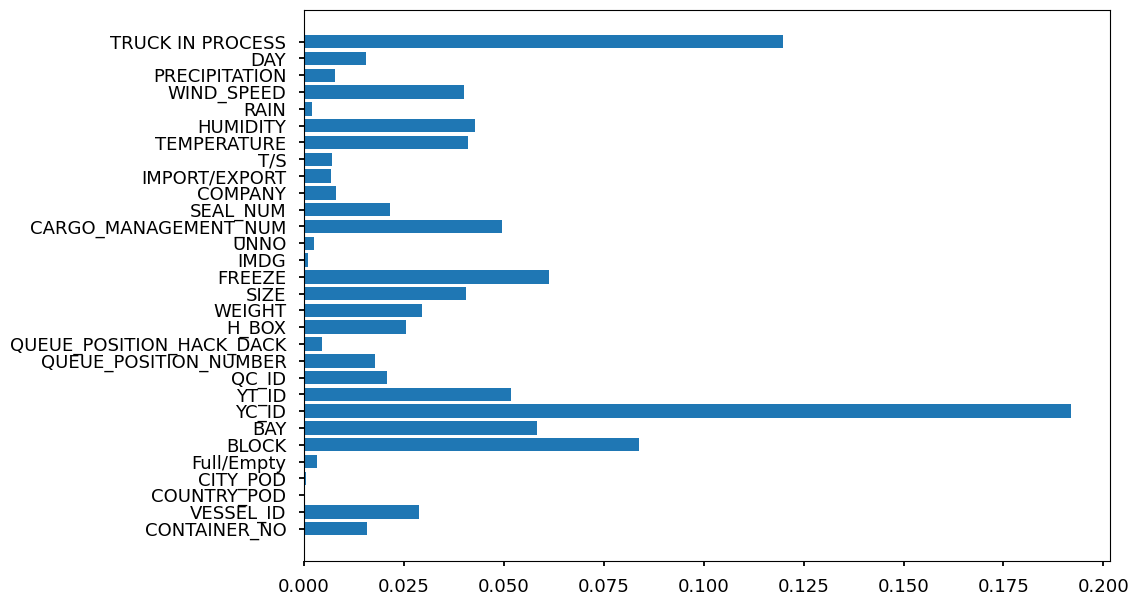

In [54]:
len(imp)
colnames = tRF.feature_names_in_
colnames
import matplotlib.pyplot as plt
plt.barh(range(len(imp)), imp)
plt.yticks(range(len(imp)), colnames)

c:\Users\hyunj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


KeyboardInterrupt: 

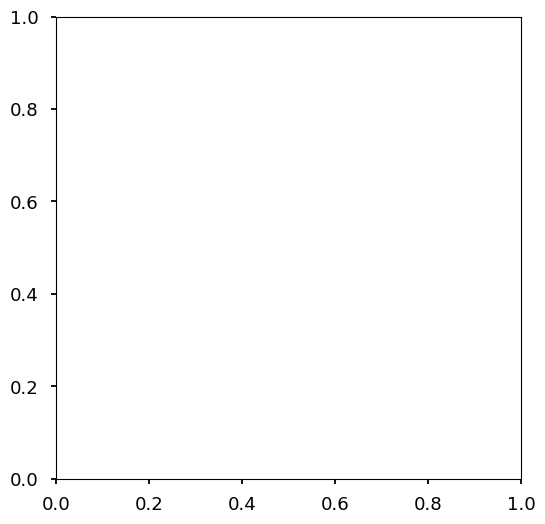

In [25]:


# PDP
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from matplotlib import pyplot as plt


feature_list = list(X.columns)
for feature in feature_list :
    fig, ax = plt.subplots(figsize=(6, 6))
    plot_partial_dependence(estimator=tRF,X=X,features=[feature],grid_resolution=round(X.shape[0]*0.5),percentiles=(0, 1),kind='average', method='brute')
